<br>

<font color='#532b88' size=5 align="left">CHL5230–Applied Machine Learning for Health Data</font><br>
<font color='#96954d' size=4 align="left">Instructor: Zahra Shakeri–Fall 2023</font><br>
<font color='#919180' size=3 align="left">Dalla Lana School of Public Health-University of Toronto </font>
<div>
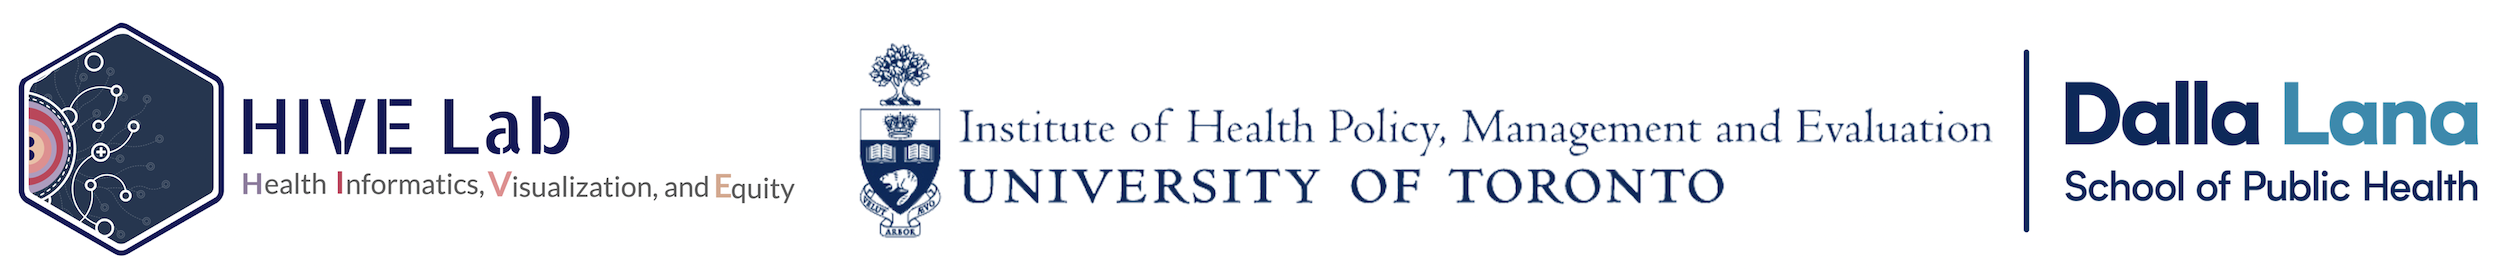
</div>


<hr>
<br>
<font color='#532b88' size=6>K-Nearest Neighbors (K-NN) Classifier</font>
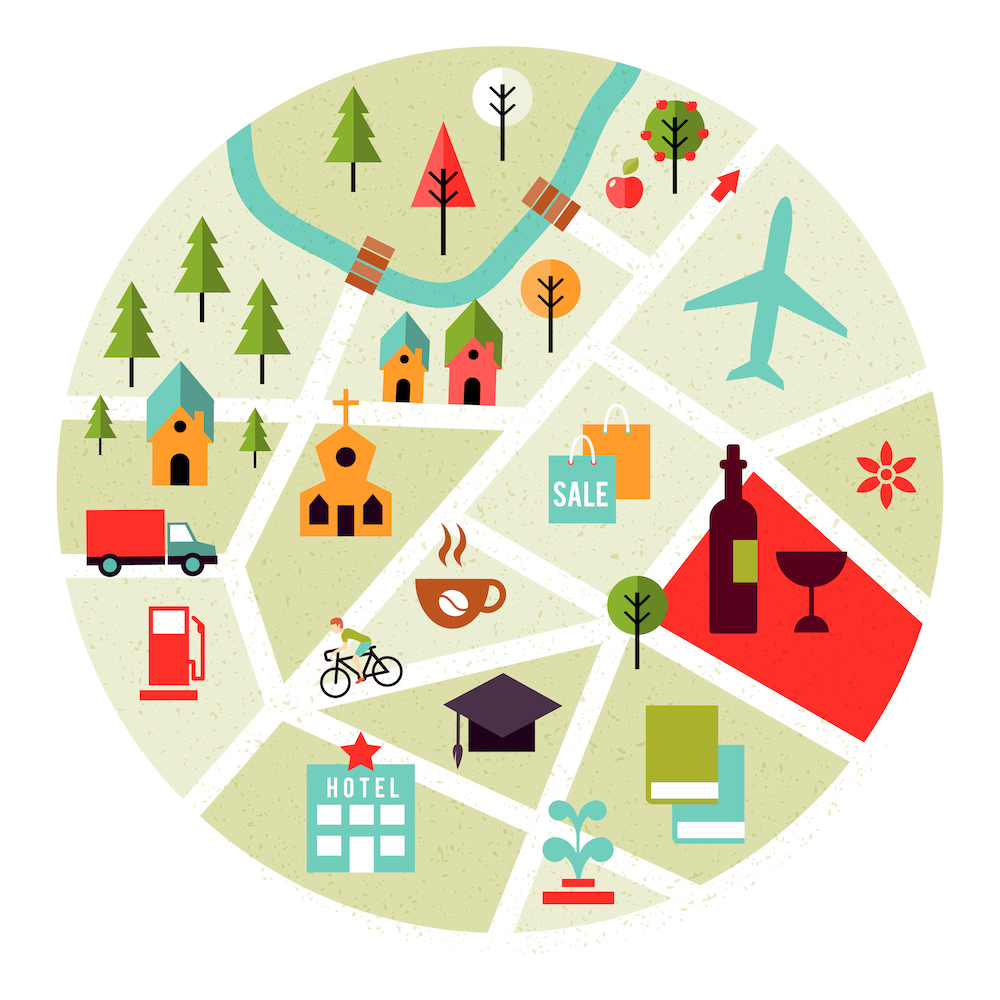

In our previous lecture, we covered the foundational principles underlying supervised learning algorithms. Building upon that foundation, this tutorial focuses on a fundamental supervised algorithm, the `K-Nearest Neighbors (K-NN)`. By the end of this lecture, you should be proficient in understanding the K-NN mechanism and applying it to real-world datasets.

### Introduction to K-NN

The **K-Nearest Neighbors** (K-NN) is categorized as a supervised learning algorithm. Within supervised learning, we primarily engage with a set of features. In this context, a *feature* is defined as a distinct attribute or characteristic believed to be pertinent in predicting the target variable. The end goal is to predict a target, which might manifest as a discrete category (classification) or a continuous numerical value (regression).

For example, consider a dataset encompassing various patient attributes such as BMI (body mass index) and smoking habits. The overarching objective could be to determine the likelihood of diabetes in the patient. This scenario epitomizes a classification task where the outcome can be split into two distinct classifications: **the presence** or **absence** of diabetes. Conventionally, a comprehensive dataset provides the correct labels (or classifications) for each set of features. The challenge then is to create an algorithm that is skilled at predicting results for new, unseen data.

### Theoretical Underpinning

A cornerstone hypothesis in machine learning proposes the existence of an intrinsic function that integrates these features and subsequently produces a class label. Traditionally, we represent features with the symbol $x$ and the target value we aspire to predict with $y$. This relationship can be expressed as:

<br>
<font size=3.5>$$f(x_1, x_2, ..., x_n) = y$$ </font>
<br>
Each $x_i$ represents a specific feature. The main objective is to approximate this function $f$ with high accuracy. However, the exact nature of $f$ is often difficult to determine, which is why we turn to machine learning. There are many algorithms available, each with different approaches and assumptions about the nature of $f$.

To help us approximate $f$, datasets with pre-established labels are essential. For example, if we have a dataset with $m$ data points that link attributes like BMI and smoking status to a patient's diabetes diagnosis, this dataset forms the foundation for our analysis. These datasets can originate from various sources, such as comprehensive surveys or medical records, but the focus of this tutorial is on how to analyze and use the dataset, rather than its source.


### K-NN Algorithm

At its core, the K-NN algorithm aims to find the $k$ data points within the dataset that are the most similar to the point we are examining. Once these $k$ points are identified, the algorithm assigns the class label that occurs most frequently among them as the predicted classification. This approach is built on the fundamental idea that similar data points tend to have similar classifications. However, it is important to note that this assumption may not always hold true, and we will explore this topic further in upcoming lectures.

Besides its effectiveness in classification, K-NN can also be used for regression tasks. In these situations, the algorithm may provide the average of the target values from the $k$ nearest data points as its prediction.

It is crucial to understand that the choice of $k$ in K-NN is considered a hyperparameter, which means that researchers have the flexibility to decide its value. Different $k$ values can lead to different results. Subsequent lectures will cover the methods and considerations that are important for making a thoughtful selection of the $k$ value.

Before we explore the practical implementation of the K-NN algorithm, it is important to become familiar with some fundamental Python libraries that aid in data manipulation and numerical operations. Two widely used libraries in this context are **Pandas** and **NumPy**. These tools not only simplify data management but also provide a solid foundation for various machine learning algorithms.

<hr>

<font color='#532b88' size=5>Implementation of K-NN with Scikit-Learn</font>

Now that you got familiar with pandas and got a little intuition about the data, let's get back to k-NN and apply it to the dataset we have.
`Scikit-Learn` is another great Python package that has plenty of ML algorithms already implemented in it.

For any algorithm, we need a measure of how good the algorithm performance is, so we can compare different algorithms and see which one is better.
Here we are predicting class labels; one way to measure performance is to see how many labels we have predicted correctly, and that is what we call accuracy. Accuracy is just the fraction of the number of samples that we correctly classified to the total number of samples.

To apply K-NN on our dataset, we need to determine a few things first:

1. **Purpose**: What is the objective of using K-NN on this dataset? In other words, what are we trying to predict? In our dataset, we could attempt to predict several columns such as `Mental_Wellbeing`, `Counseling_Hours`, `Anxiety_Level`, etc. However, for the sake of this example, we will assume you want to predict the `Mental_Wellbeing` column, which will be the **label**.

2. **Feature Selection**: Which columns will be used as features? For simplicity, let's use `Age`, `Sex`, `Stress_Score`, and `Anxiety_Level` as the features to predict `Mental_Wellbeing`.

Now, let's go step by step:

### 1. Import Necessary Libraries
```python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
```

### 2. Load the Data
```python
# We have already uploaded the dataset
df = pd.read_csv(data)
```

### 3. Preprocess the Datatttttt
First, encode the categorical data.
```python
# Encoding 'Sex' column
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # Male: 1, Female: 0
```

Next, split the data into features and label.
```python
X = df[['Age', 'Sex', 'Stress_Score', 'Anxiety_Level']]
y = df['Mental_Wellbeing']
```

Now, split the data into training and testing sets.
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

Then, scale the features since KNN is sensitive to magnitude.
```python
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
```

### 4. Apply KNN
Initialize the K-NN classifier and fit the model.
```python
knn = KNeighborsClassifier(n_neighbors=5)  # Setting K to 5 as an example
knn.fit(X_train, y_train)
```

Predict using the test data.
```python
y_pred = knn.predict(X_test)
```

### 5. Evaluate the Model
```python
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
```

### Note:
- The number of neighbors ($K$) can be tuned for better performance.
- You might have to handle other preprocessing tasks like handling missing values or outliers depending on the actual data quality.
- K-NN can also be used for regression, but in this example, we have assumed the label is categorical and used it for classification.

Here is the entire K-NN code based on the steps described.

### Uploading the Dataset

In [ ]:
#Use this if you are running the code on Colab

from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

# Read the dataset into a Pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded['mental_health_data.csv']))

# Display the first few rows of the dataset to ensure it's loaded correctly
df.head()

In [ ]:
#Use this when your CSV file is on your local machine, and it's in the same directory as your code.
import pandas as pd

df = pd.read_csv('mental_health_data.csv')
df.head()

,Age,Sex,Stress_Score,Anxiety_Level,Mental_Wellbeing,Counseling_Hours
0,53,Male,22.862516,73.806912,Moderate,4.833471
1,43,Male,90.870131,80.619588,Moderate,8.574486
2,29,Male,0.112011,84.373733,Moderate,4.224287
3,57,Female,55.618174,25.397487,Moderate,4.050783
4,22,Male,75.663580,3.111560,Good,3.938757


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Preprocess the data
# Encoding 'Sex' column
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # Male: 1, Female: 0

# Split data into features and label
X = df[['Age', 'Sex', 'Stress_Score', 'Anxiety_Level']]
y = df['Mental_Wellbeing']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=3)  # Setting K to 5 as an example
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 56   2]
 [  1 141]]
              precision    recall  f1-score   support

        Good       0.98      0.97      0.97        58
    Moderate       0.99      0.99      0.99       142

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



<hr>

In the code above, we utilize the K-Nearest Neighbors (KNN) algorithm to predict the `Mental_Wellbeing` of individuals based on features like their age, sex, stress score, and anxiety level.

**Why use a scaler?**

KNN calculates the "distance" between data points in the feature space to determine the nearest neighbors. If features have different scales (e.g., age ranges from 0 to 100, while stress score might range from 0 to 10), the distance metrics can be dominated by the feature with the larger scale. This can result in the algorithm not performing as expected, as it might overly weigh certain features.

Using a scaler, like `StandardScaler`, we standardize our features so that they have a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to the distance computation, leading to more accurate and meaningful results with KNN.

**Key functions used:**

1. **LabelEncoder**: This function is used to convert categorical labels into numerical values. For instance, the `Sex` column has values 'Male' and 'Female', which are transformed into numerical values (e.g., 1 and 0) for computational purposes.

2. **train_test_split**: This function helps in partitioning the dataset into training and testing sets. The training set is used to train the KNN model, while the testing set is used to evaluate its performance.

3. **StandardScaler**: As discussed, it's used to standardize the features. The `fit_transform` method calculates the mean and standard deviation of each feature in the training dataset and scales it. The same scaling parameters are then applied to the test dataset using the `transform` method.

4. **KNeighborsClassifier**: This function from the sklearn library helps in initializing the KNN algorithm. The parameter `n_neighbors` defines the number of neighbors the classifier should consider when making a prediction.

5. **confusion_matrix & classification_report**: These functions help in evaluating the performance of the classifier. The confusion matrix provides a matrix of true positives, true negatives, false positives, and false negatives, while the classification report provides a summary of precision, recall, f1-score, and support for each class.



<br>
<hr>
<font color='#532b88' size=5>Visualization of KNN Results Using a Confusion Matrix Heatmappppppppp</font>

In evaluating classification models, a **confusion matrix** offers a summarized view of the model's performance, showing the actual vs. predicted classifications. While a raw confusion matrix can be a bit abstract to interpret at a glance, visualizing it as a heatmap can make misclassifications more apparent.

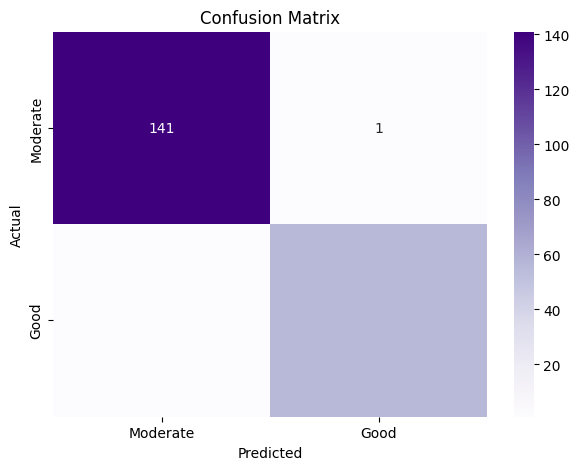

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = df['Mental_Wellbeing'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


   - `plt.figure(figsize=(7,5))`: Sets the size of the plot.
   - `sns.heatmap(...)`: Uses Seaborn's heatmap function to visualize the matrix.
     - `confusion_matrix(y_test, y_pred)`: Generates the actual confusion matrix using the true labels and predicted labels.
     - `annot=True`: Ensures that the values of the matrix are plotted in each cell.
     - `cmap='Purples'`: Sets the color palette to different shades of blue, where darker shades indicate higher numbers.
     - `fmt='g'`: Ensures that numbers are displayed without any scientific notation.
   - `plt.xlabel('Predicted')` and `plt.ylabel('Actual')`: Label the axes for clarity.
   - `plt.show()`: Displays the generated heatmap.

By observing the heatmap, one can quickly identify which classes are well-predicted by the model and where the model tends to make errors. Darker cells along the diagonal indicate correct classifications, while off-diagonal cells indicate misclassifications. The value in each cell represents the number of samples that fall into each category (e.g., true positive (TP), false positive (FP)).

Before we wrap up this section, it is important to remember thatevaluating machine learning models requires assessing their performance on *unseen* data. When models are tested on the same data they were trained on, the results can be misleading. To address this, we use a `train-test` split. The training data teaches the model and should be sizable to capture patterns effectively, while the test data is reserved for evaluating the model and contains data the model has never seen.

Key principles for data splitting include **randomness** (split data randomly to ensure both sets have the same distribution, avoiding bias), data size (balance between a substantial training set for learning and a sizable test set for robust evaluation), and typical ratios (common splits include 70% training and 30% testing for small datasets, adjusting as needed for larger datasets).


Moreover, in high-dimensional spaces, K-NN faces challenges. Picture a high-dimensional cube where most points cluster near its surface, resulting in large point-to-point distances. This contradicts KNN's assumption of nearby points behaving similarly, leading to poor performance in high dimensions. To mitigate this, when dealing with many features, it is important to select a subset strategically to enhance K-NN's performance.

*Enjoy your journey with KNN!*




<br>
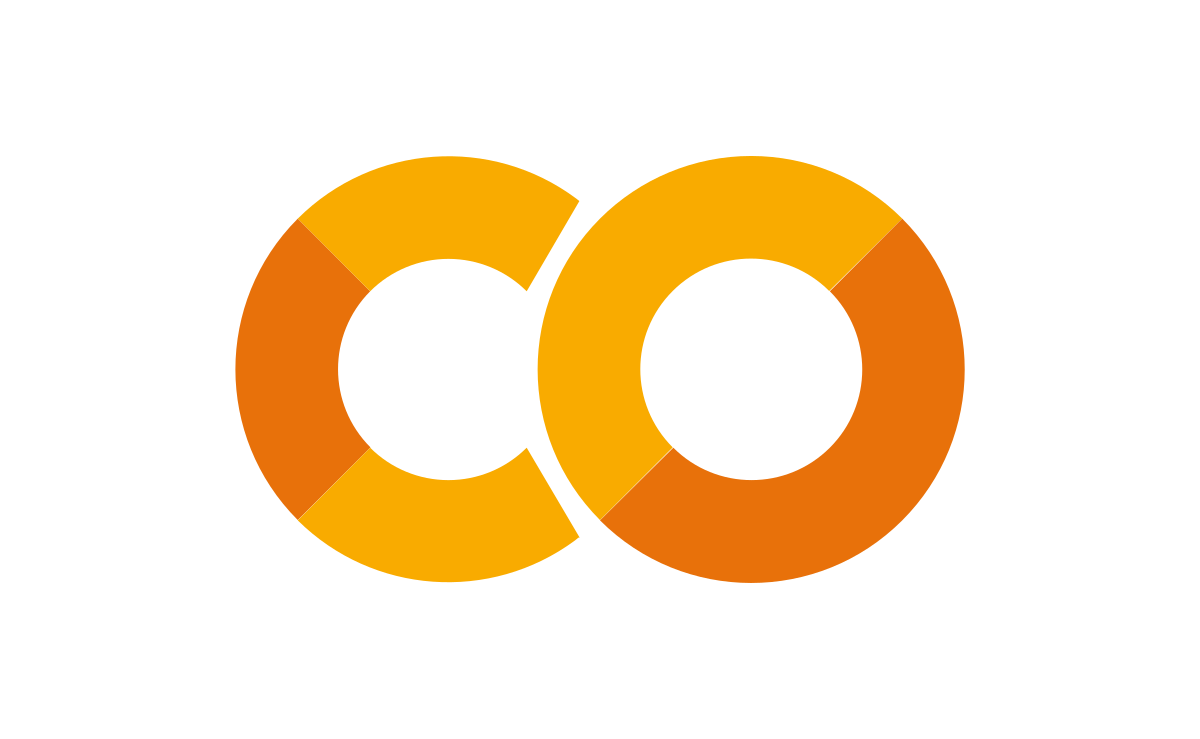

All the materials and examples from this tutorial are accessible on [Google Colab](https://drive.google.com/file/d/1LUT9OdeSX4gVHTf4SQPwSlwXhalx7_gT/view?usp=sharing). I encourage you to actively run, modify, and test the code to enhance your learning and adapt it to your unique queries and tasks.